In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Step 1. Prepare data
hello_data = 'Hello '
world_data = 'World!'


# Step 2. Define operation
hello = tf.constant(hello_data)
world = tf.constant(world_data)
concat = hello + world


# Step 3. Run operation
session = tf.Session()
print(session.run(concat))

b'Hello World!'


In [3]:
# Step 1. Prepare data
# Do nothing


# Step 2. Define operation
v1 = tf.placeholder(tf.int32)
v2 = tf.placeholder(tf.int32)
add = v1 + v2


# Step 3. Run operation
session = tf.Session()
print(session.run(add, {v1: 3, v2: 5}))  # => 8
print(session.run(add, {v1: 100, v2: 23}))  # => 123

8
123


In [4]:
x_data = np.linspace(0., 1., 6)
x_data

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [5]:
a_answer = 1.5
b_answer = .1

In [6]:
y_data = a_answer * x_data + b_answer
y_data

array([0.1, 0.4, 0.7, 1. , 1.3, 1.6])

In [7]:
# Step 2. Define operation
x = tf.placeholder(tf.float32)
y_answer = tf.placeholder(tf.float32)

a_model = tf.Variable(1.0)
b_model = tf.Variable(0.0)

In [8]:
y_model = a_model * x + b_model
loss = tf.sqrt(tf.reduce_mean((y_model - y_answer)**2))
train = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)

init = tf.global_variables_initializer()

In [9]:
# Step 1. Define data
v_data = [1., 2., 3., 4., 5.]


# Step 2. Define operation
v = tf.placeholder(tf.float32)
mean = tf.reduce_mean(v)


# Step 3. Run operation
session = tf.Session()
print(session.run(mean, {v: v_data}))  # => 3.0

3.0


In [10]:
# Step 1. Prepare data
x_data = np.linspace(0., 1., 6)  # => => [0.  0.2 0.4 0.6 0.8 1. ]
a_answer = 1.5
b_answer = .1
y_data = a_answer * x_data + b_answer  # => [0.1 0.4 0.7 1.  1.3 1.6]


# Step 2. Define operation
x = tf.placeholder(tf.float32)
y_answer = tf.placeholder(tf.float32)

a_model = tf.Variable(1.0)
b_model = tf.Variable(0.0)

y_model = a_model * x + b_model
loss = tf.sqrt(tf.reduce_mean((y_model - y_answer)**2))
train = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)

init = tf.global_variables_initializer()


# Step 3. Run operation
session = tf.Session()
session.run(init)
for i in range(20000):
    session.run(train, {x: x_data, y_answer: y_data})
    if i % 1000 == 0:
        current_loss, current_y_model = session.run(
            [loss, y_model], {x: x_data, y_answer: y_data})
        print(f"Loss: {current_loss}")
        print(f"y_model: {current_y_model}, y_answer: {y_data}")

Loss: 0.3893273174762726
y_model: [8.9871704e-05 2.0010187e-01 4.0011388e-01 6.0012591e-01 8.0013788e-01
 1.0001498e+00], y_answer: [0.1 0.4 0.7 1.  1.3 1.6]
Loss: 0.276712030172348
y_model: [0.08742284 0.29948804 0.5115532  0.72361845 0.93568367 1.1477488 ], y_answer: [0.1 0.4 0.7 1.  1.3 1.6]
Loss: 0.17969569563865662
y_model: [0.16523851 0.38935253 0.61346656 0.83758056 1.0616946  1.2858086 ], y_answer: [0.1 0.4 0.7 1.  1.3 1.6]
Loss: 0.11854960024356842
y_model: [0.21937907 0.45459557 0.68981206 0.9250285  1.160245   1.3954614 ], y_answer: [0.1 0.4 0.7 1.  1.3 1.6]
Loss: 0.09619221836328506
y_model: [0.23743686 0.48114544 0.72485405 0.9685626  1.2122712  1.4559798 ], y_answer: [0.1 0.4 0.7 1.  1.3 1.6]
Loss: 0.08563749492168427
y_model: [0.23306891 0.4831607  0.7332525  0.9833443  1.2334361  1.4835279 ], y_answer: [0.1 0.4 0.7 1.  1.3 1.6]
Loss: 0.07639279216527939
y_model: [0.2210892  0.47676486 0.73244053 0.98811626 1.2437919  1.4994676 ], y_answer: [0.1 0.4 0.7 1.  1.3 1.6]
Loss

In [11]:
def init_weight_variable(shape):
    """Initialize variable in a suitable way for weights."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def init_bias_variable(shape):
    """Initialize variable in a suitable way for biases."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


# Step 1. Prepare data
x_data = np.random.random((10, 2))
w_answer = np.array([
    [1., 2.],
    [3., 4.]
])
b_answer = np.array([
    -1.,
    5.
])
y_data = np.array([w_answer @ _x_data + b_answer for _x_data in x_data])
# y_data = (w_answer @ x_data[:, :, None] + b_answer[:, None])[:, :, 0]
# y_data = np.einsum('ij,kj->ki', w_answer, x_data) + b_answer


# Step 2. Define operation
x = tf.placeholder(tf.float32, (None, 2))
y_answer = tf.placeholder(tf.float32)

w = init_weight_variable((2, 2))
b = init_bias_variable((2,))
y_model = tf.matmul(x, w, transpose_b=True) + b

loss = tf.sqrt(tf.reduce_mean((y_model - y_answer)**2))
train = tf.train.AdamOptimizer().minimize(loss)

init = tf.global_variables_initializer()


# Step 3. Run operation
session = tf.Session()
session.run(init)
for i in range(20000):
    session.run(train, {x: x_data, y_answer: y_data})
    if i % 1000 == 0:
        current_loss, current_w, current_b = session.run(
            [loss, w, b], {x: x_data, y_answer: y_data})
        print(f"Loss: {current_loss}")
        print(f"w, b: \n{current_w}, {current_b}")

Loss: 6.435353755950928
w, b: 
[[-0.17297906 -0.04291673]
 [ 0.01741256  0.18666054]], [0.101 0.101]
Loss: 4.826993465423584
w, b: 
[[0.33881965 0.5810041 ]
 [1.0176234  1.1872803 ]], [0.29352215 1.1022981 ]
Loss: 3.2478437423706055
w, b: 
[[0.64846146 1.1573615 ]
 [2.0151343  2.1864364 ]], [-0.25563082  2.104177  ]
Loss: 1.6769461631774902
w, b: 
[[0.9476294 1.758796 ]
 [3.0066993 3.1828203]], [-0.81787086  3.1084285 ]
Loss: 0.28337588906288147
w, b: 
[[1.0000964 1.9997766]
 [3.9053729 4.11399  ]], [-0.9999253  4.089541 ]
Loss: 0.15444767475128174
w, b: 
[[1.0000007 1.9999989]
 [3.7029335 4.1436596]], [-0.9999998  4.4500723]
Loss: 0.04227149859070778
w, b: 
[[1.0000001 2.       ]
 [3.1992157 4.0274377]], [-1.         4.8527117]
Loss: 0.00018134250422008336
w, b: 
[[0.99999976 1.9999998 ]
 [2.9998848  3.9998822 ]], [-1.0000002  4.9998865]
Loss: 0.00011933093628613278
w, b: 
[[1.000069  2.0000691]
 [2.999969  3.9999688]], [-0.999931   4.9999685]
Loss: 8.781466749496758e-05
w, b: 
[[1.00

In [12]:
#DNN

Loss: 0.5109538435935974
Loss: 0.033436525613069534
Loss: 0.03290398791432381
Loss: 0.03288840875029564
Loss: 0.032868873327970505
Loss: 0.03286382555961609
Loss: 0.03286450728774071
Loss: 0.0328642874956131
Loss: 0.032863784581422806
Loss: 0.032863784581422806


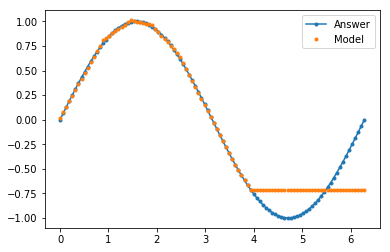

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def init_weight_variable(shape):
    """Initialize variable in a suitable way for weights."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def init_bias_variable(shape):
    """Initialize variable in a suitable way for biases."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


# Step 1. Prepare data
x_data = np.linspace(0., 2 * np.pi, 100)[:, None]
y_data = np.sin(x_data)


# Step 2. Define operation
x = tf.placeholder(tf.float32, (None, 1))
y_answer = tf.placeholder(tf.float32)

n_var = 5

w1 = init_weight_variable((1, n_var))
b1 = init_bias_variable((n_var,))
h1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w2 = init_weight_variable((n_var, n_var))
b2 = init_bias_variable((n_var,))
h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)

w3 = init_weight_variable((n_var, 1))
b3 = init_bias_variable((1,))
y_model = tf.matmul(h2, w3) + b3

loss = tf.reduce_mean((y_model - y_answer)**2)
train = tf.train.AdamOptimizer().minimize(loss)

init = tf.global_variables_initializer()


# Step 3. Run operation
session = tf.Session()
session.run(init)
for i in range(10000):
    session.run(train, {x: x_data, y_answer: y_data})
    if i % 1000 == 0:
        current_loss, current_y_model = session.run(
            [loss, y_model], {x: x_data, y_answer: y_data})
        print(f"Loss: {current_loss}")
current_loss, current_y_model = session.run(
    [loss, y_model], {x: x_data, y_answer: y_data})

plt.plot(x_data, y_data, '.-', label='Answer')
plt.plot(x_data, current_y_model, '.', label='Model')
plt.legend()
plt.show()